In [1]:
""" LIM Case Study: One-Way Range Sensitivity Analysis """
from DecisionAnalysisPy import OneWayRangeSensit
import numpy_financial as npf

In [2]:
Title = "LIM Case Study"

# Objective functions, one for each alternative. 
 # Arguments must be in the same order
def NPV_1(nsold, c_alpha, alpha, c_beta, beta, trg_c):
    return nsold*(30-(-npf.pv(0.03, 5, alpha*c_alpha + beta*c_beta)))*1000
def NPV_2(nsold, c_alpha, alpha, c_beta, beta, trg_c):
    return nsold*(30-(-npf.pv(0.03, 5, alpha*c_alpha)) -10 - trg_c)*1000
def NPV_3(nsold, c_alpha, alpha, c_beta, beta, trg_c):
    return (nsold*30 - max(750, 23*nsold))*1000
def NPV_4(nsold, c_alpha, alpha, c_beta, beta, trg_c):
    return -25.0*1000

# Put the alternative names and objective functions in a dictionary
Alternatives = { "Present Arrangement" : NPV_1,
                 "Train user"          : NPV_2,
                 "Contract IPX"        : NPV_3,
                 "Withdraw from market": NPV_4 }

In [3]:
# Put the variable names and the low, base, high values in a dictionary
Var_data = { 'Number sold'       : [  25,   30,   50],
             'Alpha repair cost' : [   9,   10,   11],
             'Alpha failure rate': [0.13, 0.15, 0.17],
             'Beta repair cost'  : [ 7.8,  8.0,  8.1],
             'Beta failure rate' : [0.68, 0.70, 0.72],
             'Training cost'     : [   4,    8,   10]}  

# Label for the objective function outputs
output_label = "NPV($)"

In [4]:
# Create a problem instance
LIM = OneWayRangeSensit(Alternatives, Var_data, Title, output_label)


One-Way Range Sensitivity for LIM Case Study

Alternative: Present Arrangement
                     low  base  high     obj_low   obj_high     swing
Number sold        25.00 30.00 50.00 -125,796.05 -62,898.03 62,898.03
Alpha repair cost   9.00 10.00 11.00  -96,086.31 -54,868.95 41,217.36
Alpha failure rate  0.13  0.15  0.17 -102,955.87 -47,999.39 54,956.49
Beta repair cost    7.80  8.00  8.10  -85,095.02 -56,242.86 28,852.16
Beta failure rate   0.68  0.70  0.72  -97,460.23 -53,495.04 43,965.19
Training cost       4.00  8.00 10.00  -75,477.63 -75,477.63      0.00
 
  Base NPV($) =  -75,477.63
  Min  NPV($) =  -125,796.05
  Max  NPV($) =  -47,999.39

 Tornado diagram for Present Arrangement:


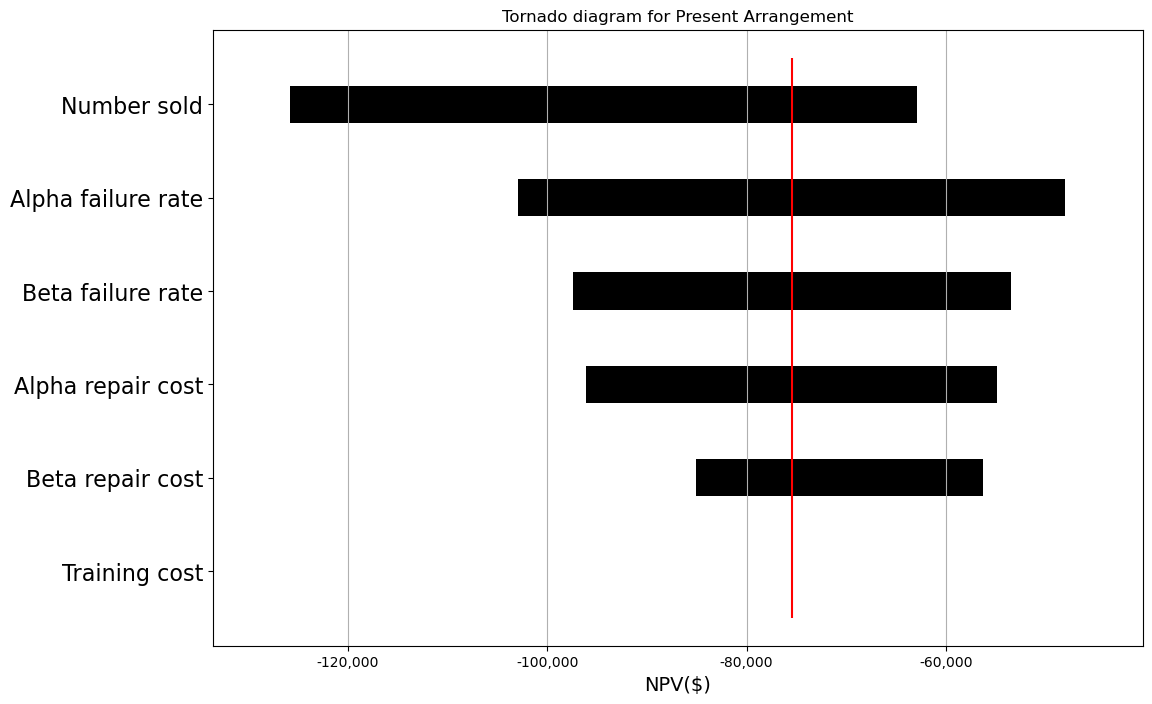


Alternative: Train user
                     low  base  high    obj_low   obj_high      swing
Number sold        25.00 30.00 50.00 128,260.98 256,521.96 128,260.98
Alpha repair cost   9.00 10.00 11.00 133,304.49 174,521.86  41,217.36
Alpha failure rate  0.13  0.15  0.17 126,434.93 181,391.42  54,956.49
Beta repair cost    7.80  8.00  8.10 153,913.18 153,913.18       0.00
Beta failure rate   0.68  0.70  0.72 153,913.18 153,913.18       0.00
Training cost       4.00  8.00 10.00  93,913.18 273,913.18 180,000.00
 
  Base NPV($) =  153,913.18
  Min  NPV($) =  93,913.18
  Max  NPV($) =  273,913.18

 Tornado diagram for Train user:


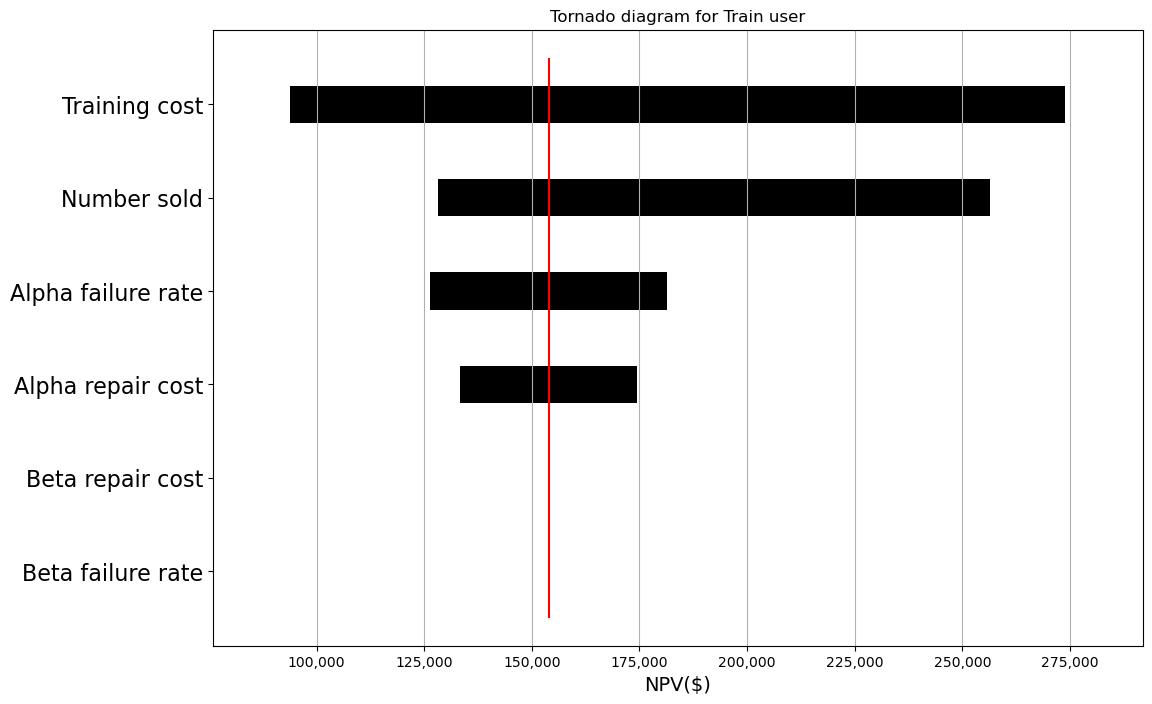


Alternative: Contract IPX
                     low  base  high    obj_low   obj_high      swing
Number sold        25.00 30.00 50.00       0.00 350,000.00 350,000.00
Alpha repair cost   9.00 10.00 11.00 150,000.00 150,000.00       0.00
Alpha failure rate  0.13  0.15  0.17 150,000.00 150,000.00       0.00
Beta repair cost    7.80  8.00  8.10 150,000.00 150,000.00       0.00
Beta failure rate   0.68  0.70  0.72 150,000.00 150,000.00       0.00
Training cost       4.00  8.00 10.00 150,000.00 150,000.00       0.00
 
  Base NPV($) =  150,000.00
  Min  NPV($) =  0.00
  Max  NPV($) =  350,000.00

 Tornado diagram for Contract IPX:


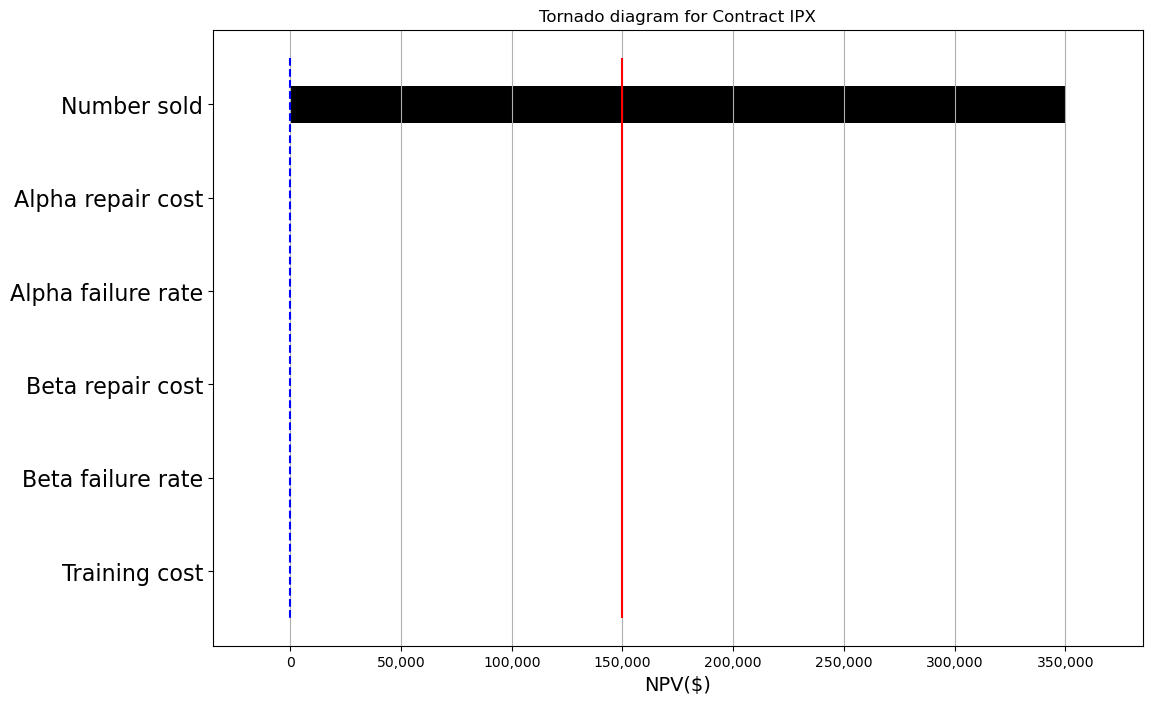


Alternative: Withdraw from market
                     low  base  high    obj_low   obj_high  swing
Number sold        25.00 30.00 50.00 -25,000.00 -25,000.00   0.00
Alpha repair cost   9.00 10.00 11.00 -25,000.00 -25,000.00   0.00
Alpha failure rate  0.13  0.15  0.17 -25,000.00 -25,000.00   0.00
Beta repair cost    7.80  8.00  8.10 -25,000.00 -25,000.00   0.00
Beta failure rate   0.68  0.70  0.72 -25,000.00 -25,000.00   0.00
Training cost       4.00  8.00 10.00 -25,000.00 -25,000.00   0.00
 
  Base NPV($) =  -25,000.00
  Min  NPV($) =  -25,000.00
  Max  NPV($) =  -25,000.00

 Tornado diagram for Withdraw from market:


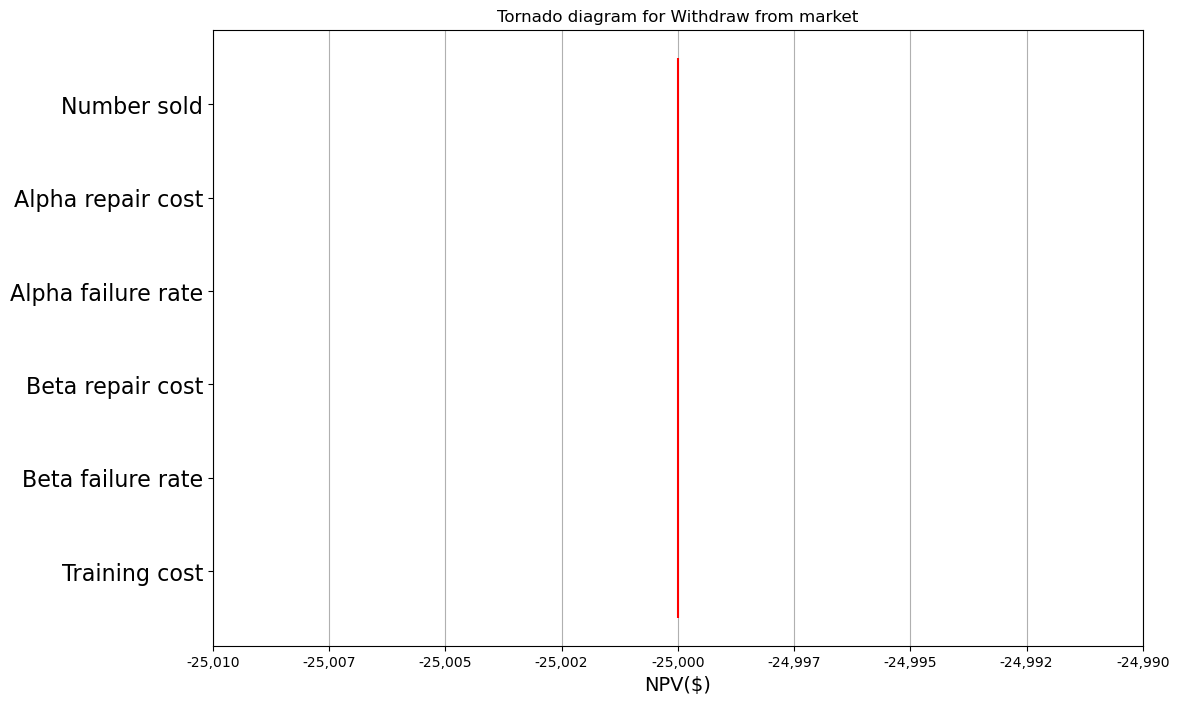

In [5]:
LIM.sensit(show_tables=True, show_tornados=True, precision=2)
# Generate combined tornados


Combined Tornado Diagrams for LIM Case Study


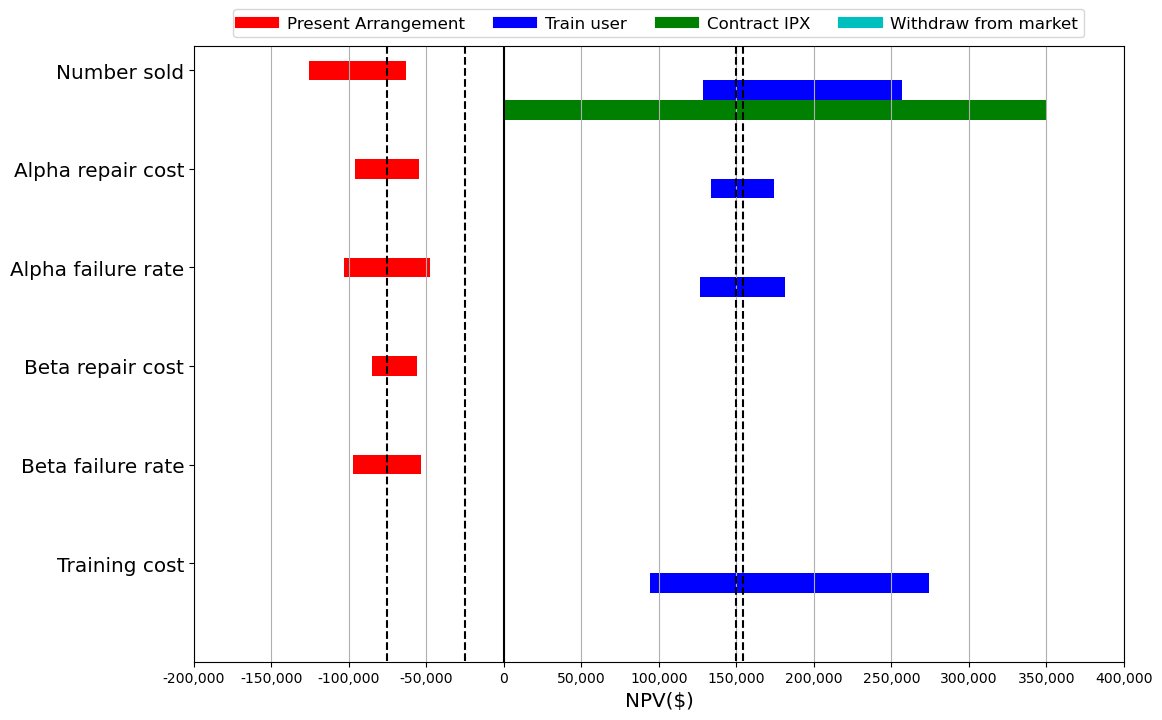

In [6]:
# Generate combined tornados
LIM.combined_tornados(-200000, 400000, 50000)